In [2]:
import csv
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
x = pd.read_csv('all_necessary_data.csv')

In [4]:
x.head()

,Name,House,Gender,Nobility,Is Dead,Num Betrayed,Num Been Betrayed,Is Betrayer,Is Betrayed
0,Hugh,Arryn,1,0,1,0,0,0,0
1,Marillion,Arryn,1,0,1,0,0,0,0
2,Mord,Arryn,1,0,0,0,0,0,0
3,Myranda,Arryn,0,1,1,0,0,0,0
4,Robin Arryn,Arryn,1,1,0,0,0,0,0


In [5]:
x['intercept'] = 1.0
train_cols = x.columns[np.array([2,3,9])]
logit = sm.Logit(x['Is Betrayed'], x[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.398396
         Iterations 7


In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Is Betrayed   No. Observations:                  161
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 May 2016   Pseudo R-squ.:                 0.09892
Time:                        18:04:56   Log-Likelihood:                -64.142
converged:                       True   LL-Null:                       -71.183
                                        LLR p-value:                 0.0008746
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Gender        -0.9381      0.492     -1.908      0.056        -1.902     0.025
Nobility       1.6796      0.577      2.911      0.004         0.549     2.811
intercept     -2.1282      0.600     -3.544      0.000        -3.305    -0.951
==============================================================================
"""

In [7]:
np.exp(-2.2064)
np.exp(-0.7114)

0.49095637717106666

In [8]:
dummy = pd.get_dummies(x['House'],prefix = 'House')

In [9]:
dummy.head()

,House_Arryn,House_Baratheon,House_Greyjoy,House_Lannister,House_Martell,House_Night's Watch,House_None,House_Stark,House_Targaryen,House_Tully,House_Tyrell,House_Wildling
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
keep = ['Name','Gender','Nobility']
new = x[keep].join(dummy.ix[:,'House_Arryn':],how='right')
new['Is Betrayer'] = x['Is Betrayer']

In [11]:
new.head()

,Name,Gender,Nobility,House_Arryn,House_Baratheon,House_Greyjoy,House_Lannister,House_Martell,House_Night's Watch,House_None,House_Stark,House_Targaryen,House_Tully,House_Tyrell,House_Wildling,Is Betrayer
0,Hugh,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Marillion,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Mord,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Myranda,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Robin Arryn,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
train_cols = new.columns[(np.array([1,2]))]
new_logit = sm.Logit(new['Is Betrayer'], new[train_cols])
new_result = new_logit.fit()

Optimization terminated successfully.
         Current function value: 0.546155
         Iterations 5


In [13]:
new_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Is Betrayer   No. Observations:                  161
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 May 2016   Pseudo R-squ.:                -0.02771
Time:                        18:04:56   Log-Likelihood:                -87.931
converged:                       True   LL-Null:                       -85.560
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Gender        -1.3311      0.285     -4.670      0.000        -1.890    -0.772
Nobility      -0.0453      0.319     -0.142      0.887        -0.671     0.580
==============================================================================
"""

In [14]:
eps = np.linspace(1,20,num=20)
p = 0.12
returns = []
cdfs = []
for i in eps:
    returns.append(ss.geom.pmf(i,p))
    cdfs.append(ss.geom.cdf(i,p))

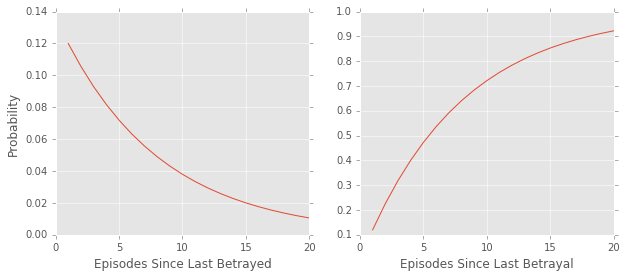

In [15]:
plt.figure(figsize = (10,4))
plt.subplot(121)
plt.plot(eps,returns)
plt.xlabel('Episodes Since Last Betrayed')
plt.ylabel('Probability')

plt.subplot(122)
plt.xlabel('Episodes Since Last Betrayal')
plt.plot(eps,cdfs)

plt.savefig('Daenerys_Bernoulli.png')

In [16]:
from scipy.special import *
print(btdtri(6,44,0.05))
print(btdtri(6,44,.95))

0.0546934444567
0.202656165391


In [20]:
eps = np.linspace(1,20,num=20)
p = 0.04
returns = []
cdfs = []
for i in eps:
    returns.append(ss.geom.pmf(i,p))
    cdfs.append(ss.geom.cdf(i,p))

cdfs[9]

0.33516736400849922